In [1]:
import getdist.plots as gplot
g = gplot.getSinglePlotter(chain_dir=r'./PLA')

samples = g.sample_analyser.samples_for_root('Datasets/Planck18/base/plikHM_TTTEEE_lowl_lowE_lensing/base_plikHM_TTTEEE_lowl_lowE_lensing_1')
p = samples.getParams()

derived = p.sigma8 * p.omegam ** 0.6



GetDistPlotError: chain not found: Datasets/Planck18/base/plikHM_TTTEEE_lowl_lowE_lensing/base_plikHM_TTTEEE_lowl_lowE_lensing_1

In [2]:
from getdist import MCSamples, plots
import getdist
samples = MCSamples(root='Datasets/Planck18/base/plikHM_TTTEEE_lowl_lowE_lensing/base_plikHM_TTTEEE_lowl_lowE_lensing_1', paramNamesFile='Datasets/Planck18/base/plikHM_TTTEEE_lowl_lowE_lensing/base_plikHM_TTTEEE_lowl_lowE_lensing.paramnames')
samples2=MCSamples(root='Datasets/Planck18/base/plikHM_TTTEEE_lowl_lowE_lensing/base_plikHM_TTTEEE_lowl_lowE_lensing_2', paramNamesFile='Datasets/Planck18/base/plikHM_TTTEEE_lowl_lowE_lensing/base_plikHM_TTTEEE_lowl_lowE_lensing.paramnames')

In [1]:
# Show plots inline, and load main getdist plot module and samples class
from __future__ import print_function
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
import getdist
# use this *after* importing getdist if you want to use interactive plots
# %matplotlib notebook
import matplotlib.pyplot as plt
import IPython
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
# matplotlib 2 may not work very well without usetex on, can uncomment
# plt.rcParams['text.usetex']=True

GetDist Version: 1.0.3, Matplotlib version: 3.1.2


<Figure size 432x324 with 0 Axes>

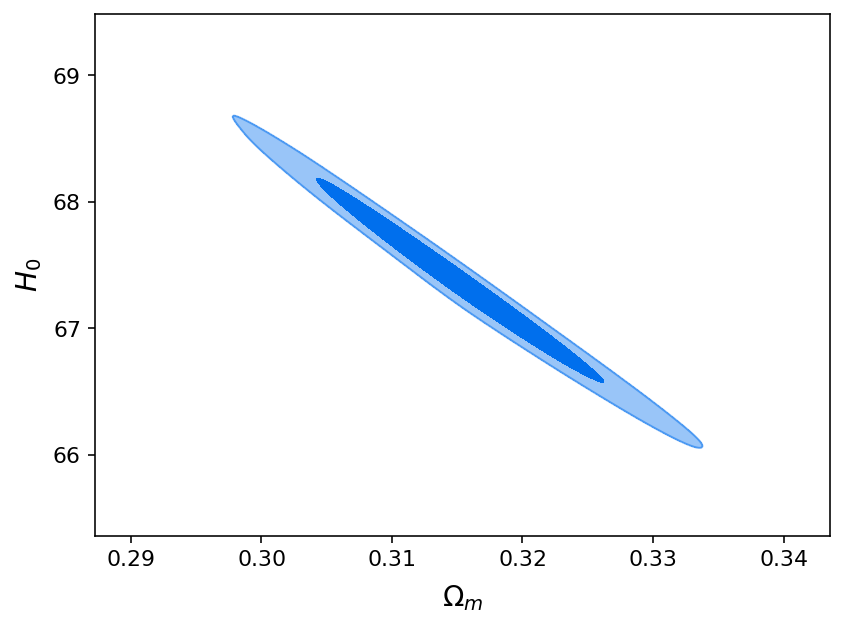

In [2]:
#Planck

g=plots.get_single_plotter(chain_dir=r'/home/nayantara/Desktop/Cosmology_Dvorkin/Project_Cosmology/Datasets/Combined chains/chains_FL2')
roots = ['base_plikHM_TTTEEE_lowl_lowE_lensing']
pairs = [['omegam', 'H0']]
g.plots_2d(roots, param_pairs=pairs, filled=True, shaded=False)
g.export()


In [4]:
analysis_settings = {'ignore_rows': '0.2'}
g=plots.get_single_plotter(chain_dir=r'/home/nayantara/Desktop/Cosmology_Dvorkin/Project_Cosmology/Datasets/Combined chains/chains_FL2/new',analysis_settings=analysis_settings)
roots = ['chfinal']
pairs = [['omegam', 'H0']]
g.plots_2d(roots, param_pairs=pairs, filled=True, shaded=False)
g.export()

/home/nayantara/Desktop/Cosmology_Dvorkin/Project_Cosmology/Datasets/Combined chains/chains_FL2/new/chfinal_1.txt
/home/nayantara/Desktop/Cosmology_Dvorkin/Project_Cosmology/Datasets/Combined chains/chains_FL2/new/chfinal_2.txt
/home/nayantara/Desktop/Cosmology_Dvorkin/Project_Cosmology/Datasets/Combined chains/chains_FL2/new/chfinal_3.txt
/home/nayantara/Desktop/Cosmology_Dvorkin/Project_Cosmology/Datasets/Combined chains/chains_FL2/new/chfinal_4.txt
Removed 0.2 as burn in


WeightedSampleError: paramNames size does not match number of parameters in samples

<Figure size 432x324 with 0 Axes>

In [33]:
#load sne
import numpy as np
Num_chains=4
matlist=[]
burnin=0.1
dirname=r'/home/nayantara/Desktop/Cosmology_Dvorkin/Project_Cosmology/Cosmo212/Results_JLA/FL2/'
for ch in range(Num_chains):
    itns = np.loadtxt(dirname+'chfinal_'+str(ch)+'.txt')
    start = int(itns.shape[0] * burnin)
    itns=itns[start:, :] #remove burnin
    itns[:, 1]=itns[:, 1]*100 #h->H0
    num_samp=itns.shape[0]
    matlist.append(np.hstack([np.ones(num_samp).reshape(-1,1), np.zeros(num_samp).reshape(-1, 1), itns]))
mat=np.vstack(matlist)
print( mat.shape)

(720000, 4)


In [34]:
np.savetxt(r'/home/nayantara/Desktop/Cosmology_Dvorkin/Project_Cosmology/Datasets/Combined chains/chains_FL2/ch_final.txt', mat)

In [8]:
mat[:, 1] = mat[:, 1]*100
names=['omegam', 'H0']
labels=['\Omega_m', 'H_0']
samp_sne=MCSamples(samples=mat, names = names, labels = labels)

Removed no burn in


In [24]:
samp_Planck=MCSamples(root=r'/home/nayantara/Desktop/Cosmology_Dvorkin/Project_Cosmology/Datasets/Combined chains/chains_FL2/base_plikHM_TTTEEE_lowl_lowE_lensing')
print (samp_Planck.paramNames)

AttributeError: 'NoneType' object has no attribute 'dot'

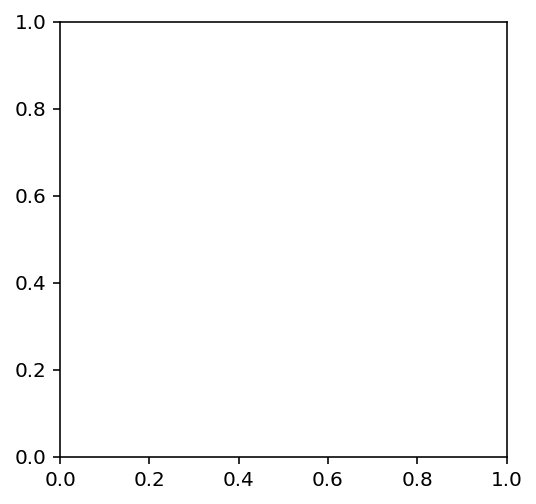

In [26]:
# Filled 2D comparison plot with legend
g = plots.get_single_plotter(width_inch=4, ratio=1)
g.plot_2d([samp_Planck, samp_sne], 'omegam', 'H0', filled=True)
g.add_legend(['Planck', 'JLA'], colored_text=True);

In [ ]:
import numpy as np